In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import random
from datetime import datetime
MAX_REQUESTS = 1e4
print("imported")
import pandas as pd

imported


In [2]:
from queue import Queue
from threading import Thread
import time


def compute(lambda_):
    items = []
    def treat_job(q):
        while True:
            obj = q.get()
            job, s, (t11, t12), (t21,t22) = obj
        
            if job == 1:
                t11 = (datetime.utcnow()-start).total_seconds()*1000
                sleep_time = random.lognormvariate(1.5, 0.6)/1000
                time.sleep(sleep_time)
                t12 = (datetime.utcnow()-start).total_seconds()*1000
                q.put((2, s , (t11, t12), (t21, t22)))

            if job == 2:
                t21 = (datetime.utcnow()-start).total_seconds()*1000
                sleep_time = random.uniform(0.6,1)/1000
                time.sleep(sleep_time)
                t22 = (datetime.utcnow()-start).total_seconds()*1000
                items.append([s , t11, t12, t21, t22])

            q.task_done()

    q = Queue(maxsize=0) 

    worker = Thread(target=treat_job, args=(q,))
    worker.setDaemon(True)
    worker.start()
    start = datetime.utcnow()

    for _ in range(10**4):
        q.put((1, (datetime.utcnow()-start).total_seconds()*1000, (0, 0), (0,0)))
        time.sleep(random.expovariate(lambda_))
    print("Done putting into queue!")
    q.join()
    print("Queue done joining")
    return items

In [3]:
items = compute(80)

Done putting into queue!
Queue done joining


In [4]:
df = pd.DataFrame(items, columns = ['Start', 'T11', 'T12', 'T21', 'T22'])

In [5]:
df.head()

,Start,T11,T12,T21,T22
0,0.005,0.048,9.350,9.400,10.632
1,10.701,10.753,14.669,14.725,15.618
2,33.415,33.526,39.900,51.761,53.174
3,38.743,39.985,51.676,53.248,54.553
4,53.290,54.629,57.213,57.279,58.429


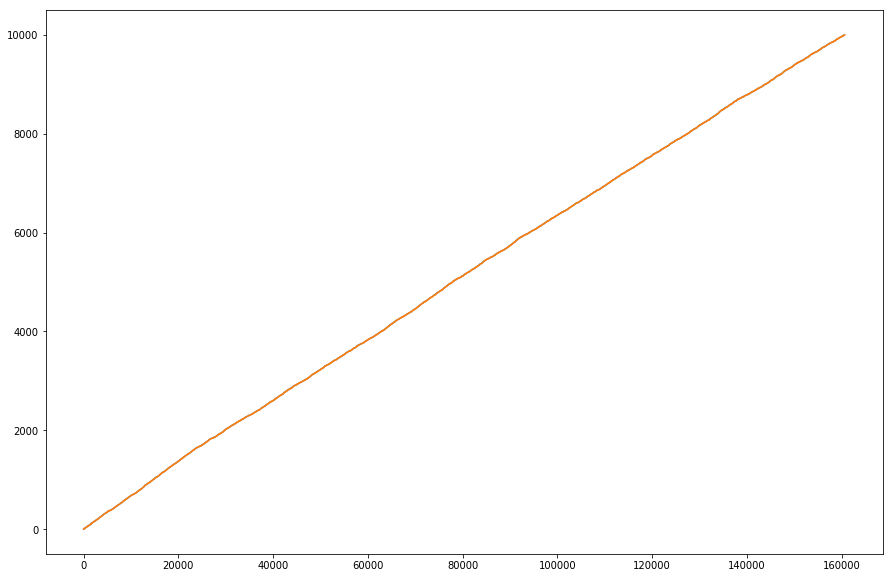

In [6]:
plt.figure(figsize=(15,10))
plt.plot(df['Start'], range(10**4))
plt.step(df['T22'], range(10**4))
plt.show()

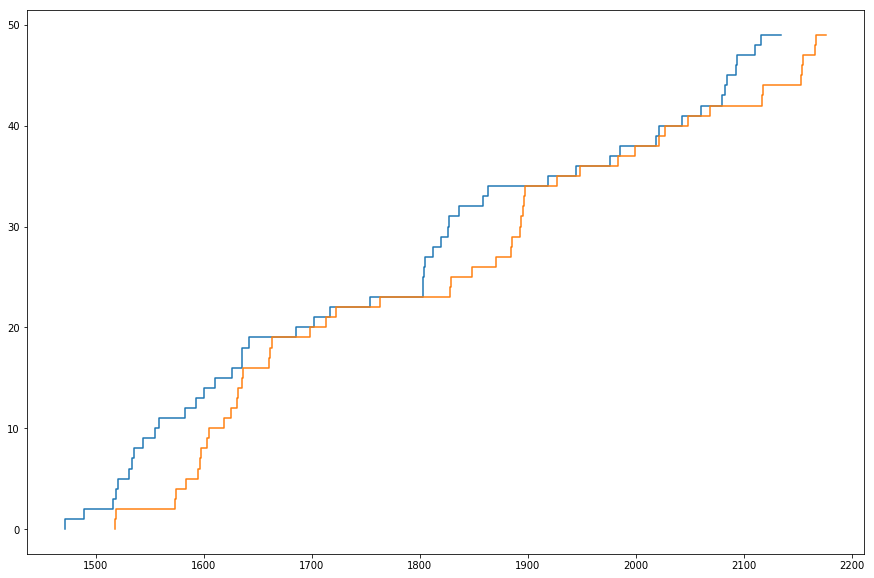

In [7]:
plt.figure(figsize=(15,10))
plt.step(df['Start'][100:150], range(50))
plt.step(df['T22'][100:150], range(50))
plt.show()

In [8]:
interesting_times = np.sort(np.concatenate((df['Start'].values, df['T12'].values)))
type1_in_queue = []
type2_in_queue = []
for t in interesting_times:
    type_ones = df[((df['Start'] - t) < 0) & ((df['T12'] - t > 0))]
    type_twos = df[((df['T12'] - t) < 0) & ((df['T22'] - t > 0))]
    type1_in_queue.append(len(type_ones))
    type2_in_queue.append(len(type_twos))

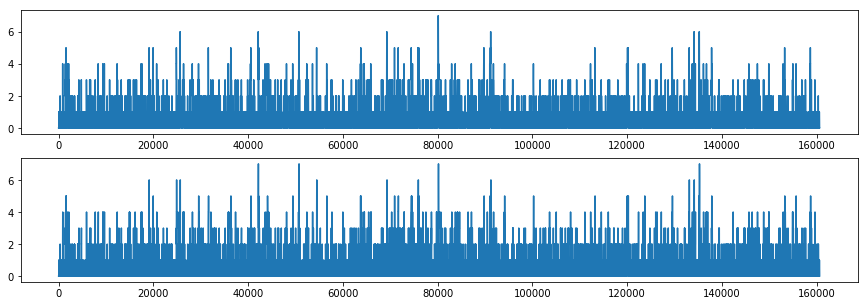

In [9]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(2,1,1)
plt.plot(interesting_times, type1_in_queue)
fig.add_subplot(2,1,2)
plt.plot(interesting_times, type2_in_queue);


# 2

In [10]:
lambdas = np.arange(25, 250, 25)
queues = []

In [12]:
items = []
for l in lambdas: 
    it = compute(l)
    items.append(it)

Done putting into queue!
Queue done joining
Done putting into queue!
Queue done joining
Done putting into queue!
Queue done joining
Done putting into queue!
Queue done joining
Done putting into queue!
Queue done joining
Done putting into queue!
Queue done joining
Done putting into queue!
Queue done joining
Done putting into queue!
Queue done joining
Done putting into queue!
Queue done joining


In [20]:
#for i in range(len(items)): 
#    df = pd.DataFrame(items[i], columns = ['Start', 'T11', 'T12', 'T21', 'T22'])
#    df.to_csv("lambda_"+str(25*(i+1)), index=False)